# K-Nearest Neighbours Project
Objective: Use KNN as a regression technique to predict annual insurance premium prices of individuals

In [1]:
!wget https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv

--2024-01-07 04:13:43--  https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘medical-charges.csv’

medical-charges.csv 100%[===================>]  54.32K  --.-KB/s    in 0.007s  

2024-01-07 04:13:43 (7.24 MB/s) - ‘medical-charges.csv’ saved [55628/55628]



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
insurance_df = pd.read_csv("medical-charges.csv")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Visualising data correlation
using `seaborn` and `pyplot`

<Axes: title={'center': 'Charges vs BMI'}, xlabel='bmi', ylabel='charges'>

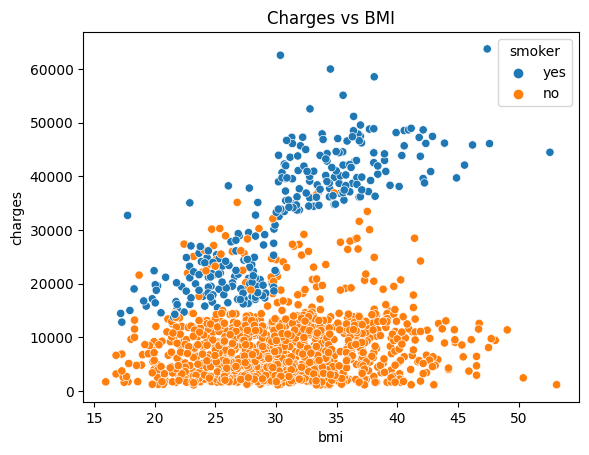

In [4]:
plt.title("Charges vs BMI")
sns.scatterplot(insurance_df,
                x="bmi",
                y="charges",
                hue="smoker"
                )

A combined effect of `BMI` and `Smoker` would have a more significant effect on `Charges`. As `BMI` increases for `smokers`, `Charges` is likely to increase.

`BMI` by itself does not seem to have a significant correlation with `Charges`.

Converting `smoker` into a numerical label.

In [5]:
smoker_yes = (insurance_df["smoker"] == "yes").astype(np.int32)
smoker_yes

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

<Axes: title={'center': 'Charges vs BMI'}, xlabel='bmi', ylabel='charges'>

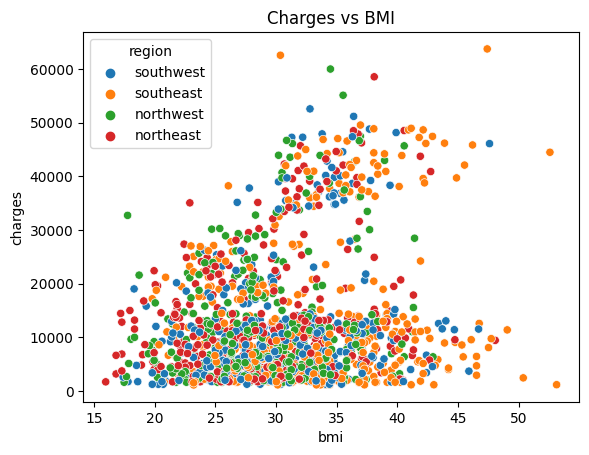

In [6]:
plt.title("Charges vs BMI")
sns.scatterplot(insurance_df,
                x="bmi",
                y="charges",
                hue="region"
                )

No clear trend between `BMI` and `Charges` when `Region` is accounted for.

<Axes: title={'center': 'Charges vs Age'}, xlabel='age', ylabel='charges'>

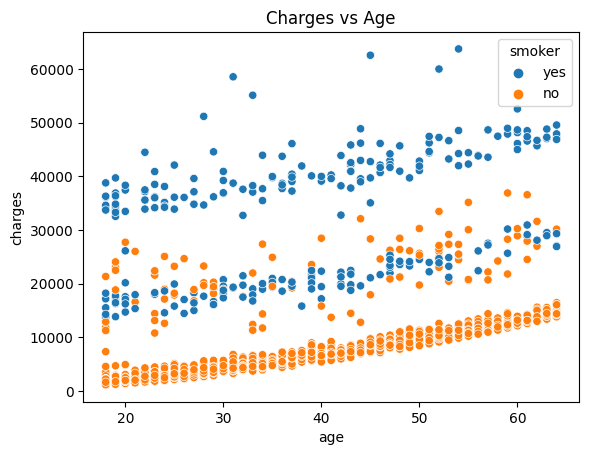

In [7]:
plt.title("Charges vs Age")
sns.scatterplot(insurance_df,
                x="age",
                y="charges",
                hue="smoker"
                )

`Charges` clearly increases with `Age`, even more so for `smokers`.

Using `.corr` method in `Pandas` to confirm correlation between all numerical variables.

The smaller the correlation value, the weaker the correlation.

In [8]:
corr_age = insurance_df.charges.corr(insurance_df.age)
corr_bmi = insurance_df.charges.corr(insurance_df.bmi)
corr_children = insurance_df.charges.corr(insurance_df.children)
corr_smoker = insurance_df.charges.corr(smoker_yes)

In [9]:
print(f'Charges vs Age: {corr_age:.4f}')
print(f'Charges vs BMI: {corr_bmi:.4f}')
print(f'Charges vs Children: {corr_children:.4f}')
print(f'Charges vs Smoker: {corr_smoker:.4f}')

Charges vs Age: 0.2990
Charges vs BMI: 0.1983
Charges vs Children: 0.0680
Charges vs Smoker: 0.7873


It can be observed that `Smoker`, `Age` and `BMI` are largely relevant to the `Charges` variable.

### Performing train test split

In [10]:
features, labels = insurance_df.iloc[:, :-1], insurance_df.iloc[:, -1]

In [11]:
features

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.25, random_state=42)

In [13]:
norm = Normalizer()
norm.fit(xtrain[["age", "bmi", "children"]])
xtrain[["age", "bmi", "children"]] = norm.transform(xtrain[["age", "bmi", "children"]])

In [14]:
xtest[["age", "bmi", "children"]] = norm.transform(xtest[["age", "bmi", "children"]])
xtrain.head()

,age,sex,bmi,children,smoker,region
693,0.712207,male,0.701969,0.000000,no,northwest
1297,0.725189,female,0.686599,0.051799,no,southeast
634,0.789008,male,0.614188,0.015471,no,southwest
1022,0.793113,male,0.608841,0.016875,yes,southeast
178,0.846182,female,0.531623,0.036791,no,southwest


In [15]:
xtest.head()

,age,sex,bmi,children,smoker,region
764,0.872057,female,0.487867,0.038758,no,northeast
887,0.768011,female,0.640436,0.000000,no,northwest
890,0.921956,female,0.387294,0.000000,yes,northwest
1293,0.871218,male,0.487598,0.056819,no,northwest
259,0.511484,male,0.859293,0.000000,yes,northwest


##Preprocess features
Use of `Normalizer`

`One-hot Encoding` the categorical string data

In [16]:
xtrain = pd.get_dummies(xtrain, drop_first=True)
xtest = pd.get_dummies(xtest, drop_first=True)
xtrain.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
693,0.712207,0.701969,0.000000,1,0,1,0,0
1297,0.725189,0.686599,0.051799,0,0,0,1,0
634,0.789008,0.614188,0.015471,1,0,0,0,1
1022,0.793113,0.608841,0.016875,1,1,0,1,0
178,0.846182,0.531623,0.036791,0,0,0,0,1


In [17]:
knn = KNeighborsRegressor(5)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
ypred.shape

(335,)

In [18]:
ytest = ytest.to_numpy()
mae = mean_absolute_error(ytest, ypred)
print(mae)

4615.712519573134


### Evaluating KNN Method

In [19]:
eval_df = pd.DataFrame(xtest, columns=list(xtrain.columns))
eval_df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
764,0.872057,0.487867,0.038758,0,0,0,0,0
887,0.768011,0.640436,0.000000,0,0,1,0,0
890,0.921956,0.387294,0.000000,0,1,1,0,0
1293,0.871218,0.487598,0.056819,1,0,1,0,0
259,0.511484,0.859293,0.000000,1,1,1,0,0


In [20]:
eval_df["mae"] = np.absolute(ytest - ypred)
eval_df = eval_df.sort_values("mae", ascending=False)
eval_df.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,mae
543,0.751472,0.659765,0.000000,0,1,0,1,0,28147.173028
599,0.810511,0.584893,0.031174,0,0,1,0,0,23739.914880
806,0.694564,0.719221,0.017364,0,0,1,0,0,23571.052850
430,0.497831,0.867274,0.000000,1,0,0,0,1,21103.568730
1033,0.640797,0.767710,0.000000,1,1,0,0,0,20567.651026


## Finding the best n-value

In [21]:
n_neighbors = np.arange(3, 40, 2)

In [22]:
mae_values = []
for n in n_neighbors:
  knn = KNeighborsRegressor(n)
  knn.fit(xtrain, ytrain)
  ypreds = knn.predict(xtest)
  mae = mean_absolute_error(ytest, ypreds)
  mae_values.append(mae)

mae_values

[4622.861372062686,
 4615.712519573134,
 4512.021426994883,
 4438.003767502819,
 4486.921315948168,
 4464.815878137084,
 4424.059815177115,
 4390.098126961018,
 4389.101702633307,
 4392.879084530064,
 4399.3321880671,
 4448.718704598806,
 4448.152443636594,
 4452.493280435512,
 4494.338931481849,
 4500.837415814292,
 4520.653757212367,
 4555.733337135377,
 4603.03065362564]

In [23]:
best_idx = np.argmin(mae_values)
best_n = n_neighbors[best_idx]
print(f'The best n value is {best_n}, yielding a MAE of {mae_values[best_idx]}.')

The best n value is 19, yielding a MAE of 4389.101702633307.


# Improving on our KNN method to predict insurance premium costs
Removing `Region` as it has little correlation to the `Charges`, perhaps improving our MAE.

In [24]:
xtrain_reduced = xtrain[["age", "bmi", "smoker_yes"]]
xtest_reduced = xtest[["age", "bmi", "smoker_yes"]]
xtrain_reduced

,age,bmi,smoker_yes
693,0.712207,0.701969,0
1297,0.725189,0.686599,0
634,0.789008,0.614188,0
1022,0.793113,0.608841,1
178,0.846182,0.531623,0
...,...,...,...
1095,0.494905,0.861959,0
1130,0.847871,0.518940,0
1294,0.917315,0.398162,0
860,0.613374,0.789097,1


In [25]:
knn_2 = KNeighborsRegressor(5)
knn_2.fit(xtrain_reduced, ytrain)
ypreds_2 = knn_2.predict(xtest_reduced)
mae_2 = mean_absolute_error(ytest, ypreds_2)

print(f'The new MAE is: {mae_2:.6f}')

The new MAE is: 4652.650695


In [26]:
mae_values_2 = []
for n in n_neighbors:
  knn = KNeighborsRegressor(n)
  knn.fit(xtrain_reduced, ytrain)
  ypreds = knn.predict(xtest_reduced)
  mae = mean_absolute_error(ytest, ypreds)
  mae_values_2.append(mae)

In [27]:
mae_values_2

[4727.666069569154,
 4652.650695334329,
 4499.521264291258,
 4486.285930232503,
 4447.363171044505,
 4341.680937948794,
 4387.189656548259,
 4420.849656989113,
 4346.453522504477,
 4328.367725654442,
 4340.461667276703,
 4338.716730968955,
 4337.987007266224,
 4346.7715027185795,
 4343.017634652768,
 4321.663670491814,
 4337.620418066951,
 4350.796920349577,
 4343.112844372063]

In [28]:
n_2_min = np.argmin(mae_values_2)
print(f'The best n value {n_neighbors[n_2_min]} yields a MAE of {np.min(mae_values_2)}')

The best n value 33 yields a MAE of 4321.663670491814


# Using a Linear Regression approach to this problem

In [29]:
from sklearn.linear_model import LinearRegression

Fitting on non-reduced data and comparing with reduced data

In [31]:
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
ypred_linear = linreg.predict(xtest)
linreg_mae = mean_absolute_error(ytest, ypred_linear)

linreg_reduced = LinearRegression()
linreg_reduced.fit(xtrain_reduced, ytrain)
ypred_linear_reduced = linreg_reduced.predict(xtest_reduced)
linreg_mae_reduced = mean_absolute_error(ytest, ypred_linear_reduced)

In [32]:
print(f'Mean absolute error for non-reduced data: {linreg_mae}')
print(f'Mean absolute error for reduced data: {linreg_mae_reduced}')

Mean absolute error for non-reduced data: 4814.198750962857
Mean absolute error for reduced data: 4829.574553351901


### Checking weights on both linear models

In [34]:
coef = linreg.coef_
coef_reduced = linreg_reduced.coef_
print(f'Weights for non-reduced model: {coef}')
print(f'Weights for reduced model: {coef_reduced}')

Weights for non-reduced model: [ -3908.48401871 -20404.32735204    984.20707095    117.49562014
  23427.39984615     23.49559257   1287.08071111    212.2335267 ]
Weights for reduced model: [ -4577.81615656 -20508.06187683  23484.39092328]


In [35]:
xtrain

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
693,0.712207,0.701969,0.000000,1,0,1,0,0
1297,0.725189,0.686599,0.051799,0,0,0,1,0
634,0.789008,0.614188,0.015471,1,0,0,0,1
1022,0.793113,0.608841,0.016875,1,1,0,1,0
178,0.846182,0.531623,0.036791,0,0,0,0,1
...,...,...,...,...,...,...,...,...
1095,0.494905,0.861959,0.109979,0,0,0,0,0
1130,0.847871,0.518940,0.108701,0,0,0,1,0
1294,0.917315,0.398162,0.000000,1,0,0,0,0
860,0.613374,0.789097,0.033155,0,1,0,0,1


In [36]:
xtrain_reduced

,age,bmi,smoker_yes
693,0.712207,0.701969,0
1297,0.725189,0.686599,0
634,0.789008,0.614188,0
1022,0.793113,0.608841,1
178,0.846182,0.531623,0
...,...,...,...
1095,0.494905,0.861959,0
1130,0.847871,0.518940,0
1294,0.917315,0.398162,0
860,0.613374,0.789097,1


### From the coefficients (weights) using the `coef_` attribute, `bmi` and `smoker_yes` have the most significant impact on the predicted data.
This aligns with our observations using the scatter plot and `corr` method from `pandas`.